<img src="magpie_logo.png" alt= “magpie_logo” width="100" align="right">

## **MAGPIE: an interactive tool for visualizing and analyzing many simultaneous protein interactions with a binding partner**

**What is this tool?**
MAGPIE generates 3D visualizations for sets of protein binders interacting with one target ligand (which can be a protein or a small molecule). It also produces sequence logo-style amino acid (AA) frequency graphs. In the AA frequency graphs, the user chooses target ligand positions on the fly, and the size of each binder AA is based on the frequency that it appears in the protein complex dataset within a user-defined distance from the chosen target ligand position(s). The distance is calculated using the alpha carbon positions between protein interfaces, or all heavy atoms in the case of ligands. MAGPIE's 3D visualizer plots the entire target structure, and highlights the residues within a specified distance constraint. There are two options for coloring the interacting residues based on [Amino colour](http://acces.ens-lyon.fr/biotic/rastop/help/colour.htm#aminocolours) and [Shapely colour](http://acces.ens-lyon.fr/biotic/rastop/help/colour.htm#shapelycolours). If you don't mind that your data is semi-public, or have <1000 input PDB files, it may be more convenient to compute on the cloud with [the Google CoLab version](https://colab.research.google.com/github/glasgowlab/MAGPIE/blob/GoogleColab/MAGPIE_COLAB.ipynb).

**Required Inputs:**
- PDB files: these should be aligned on the target ligands. Two examples are provided on GitHub, one for protein-protein interactions and one for small molecule-protein interactions.
- Target chain ID from PDB: the program uses the first file in the directory to upload the target ligand structure.
- Protein binder chain ID from PDB: this chain identifier must be the same across all PDB files.
- Target type: indicate whether the target ligand is a small molecule or a protein.
- Target residue index (for protein ligands) or unique atom names (for small molecule ligands): provide the target residue indices for proteins or unique atom names for small molecules. Alternatively, you can input 'all' to consider all AAs/heavy atoms.

**Usage:**
Please execute the cells in numerical order. If you wish to load a different dataset, start from the upload step to reload the new data.


## **1. Run required packages, then upload and process data  ↓**

Run the next cell to input the path to your directory containing all the input PDB files.

Type either **'Protein Example'** or **'Ligand Example'** to run the example datasets.

In [2]:
import sequence_logo_main
import glob

pdb_files = input("Enter path to files: ")
pdb_files = glob.glob(f"{pdb_files}/*.pdb")
print(pdb_files)

['HA_docked_inputs/helix_00279-80mpnn-1.pdb-0.9_1_16.pdb', 'HA_docked_inputs/helix_00755-22mpnn-1.pdb-0.9_1_19.pdb', 'HA_docked_inputs/helix_01053-171mpnn-1.pdb-0.9_1_16.pdb', 'HA_docked_inputs/helix_01988-24mpnn-1.pdb-0.9_1_16.pdb', 'HA_docked_inputs/helix_02702-116mpnn-1.pdb-0.9_1_16.pdb', 'HA_docked_inputs/helix_03703-15mpnn-1.pdb-0.9_1_16.pdb', 'HA_docked_inputs/helix_03901-108mpnn-0.pdb-0.9_1_16.pdb', 'HA_docked_inputs/helix_03901-108mpnn-1.pdb-0.9_1_16.pdb', 'HA_docked_inputs/helix_04028-144mpnn-0.pdb-0.9_1_16.pdb', 'HA_docked_inputs/helix_04028-144mpnn-1.pdb-0.9_1_16.pdb', 'HA_docked_inputs/helix_04424-154mpnn-0.pdb-0.9_1_17.pdb', 'HA_docked_inputs/helix_04424-84mpnn-0.pdb-0.9_1_17.pdb', 'HA_docked_inputs/helix_04547-68mpnn-0.pdb-0.9_1_16.pdb', 'HA_docked_inputs/helix_04677-34mpnn-0.pdb-0.9_1_16.pdb', 'HA_docked_inputs/helix_04677-34mpnn-1.pdb-0.9_1_16.pdb', 'HA_docked_inputs/helix_05065-13mpnn-0.pdb-0.9_1_17.pdb', 'HA_docked_inputs/helix_05067-127mpnn-1.pdb-0.9_1_16.pdb', 'HA_d

## 2. Select target ligand and protein binder chains.
Select target ligand and protein binder chains, decide whether the target ligand is a ligand or protein, provide heavy atom names (if small molecule ligand) or residue index (if protein ligand) to plot around, and provide the distance in Ångstroms to graph from the target chain.

You can also type 'all' to plot all residues or atoms.

**Example usage:**
- For the protein target example, use A for the target ligand chain and B for the protein binder chain.
- For the small molecule target example, use X for the target chain and A for the protein binder chain. Check the is_ligand option.





In [3]:
target_chain = input("Target chain: ")
binding_chain = input("Binding chain: ")
is_ligand = input("Is small-molecule ligand?: ('True' or 'False'): ")
distance = int(input("How many Å from target to graph?: " ))
if is_ligand == "True":
    is_ligand = True
else:
    is_ligand = False



## 3. Plot points in 3D viewer.

In [4]:
from matplotlib.pyplot import plot
residues_found, target_chain = sequence_logo_main.plot(pdb_files, target_chain,binding_chain,is_ligand, distance)



## **4. Select target ligand residues or heavy atoms to generate AA frequency graphs.**
Enter the target residue indices or heavy atom names to graph. These should be separated by commas, without spaces (e.g., N1A,N3A,N9A).

If there are no residues within the given range, the next cell will not execute.

In [10]:
sequence_logo_targets = input("Residues to graph: ")

if is_ligand:
    plot_list = [str(x) for x in sequence_logo_targets.split(",")]
else:
    if "-" in sequence_logo_targets:
        plot_list = [x for x in range(int(sequence_logo_targets.split("-")[0]),int(sequence_logo_targets.split("-")[1])+1 )]
    else:
        plot_list =[int(x) for x in sequence_logo_targets.split(",")]



## **6.  Generate AA frequency graphs.**
Indicate whether you'd like to only see the combined AA frequency graph.

No AA within 8 Å of target id: L100
No AA within 8 Å of target id: K101
No AA within 8 Å of target id: G102
No AA within 8 Å of target id: I103
No AA within 8 Å of target id: A104
No AA within 8 Å of target id: P105
No AA within 8 Å of target id: L106
No AA within 8 Å of target id: Q107
No AA within 8 Å of target id: L108
No AA within 8 Å of target id: G109
No AA within 8 Å of target id: K110
No AA within 8 Å of target id: C111
No AA within 8 Å of target id: N112
No AA within 8 Å of target id: I113
No AA within 8 Å of target id: A114
No AA within 8 Å of target id: G115
No AA within 8 Å of target id: W116
No AA within 8 Å of target id: L117
No AA within 8 Å of target id: L118
No AA within 8 Å of target id: G119
No AA within 8 Å of target id: N120
No AA within 8 Å of target id: P121
No AA within 8 Å of target id: E122
No AA within 8 Å of target id: C123
No AA within 8 Å of target id: L126
No AA within 8 Å of target id: A129
No AA within 8 Å of target id: S130
No AA within 8 Å of target i

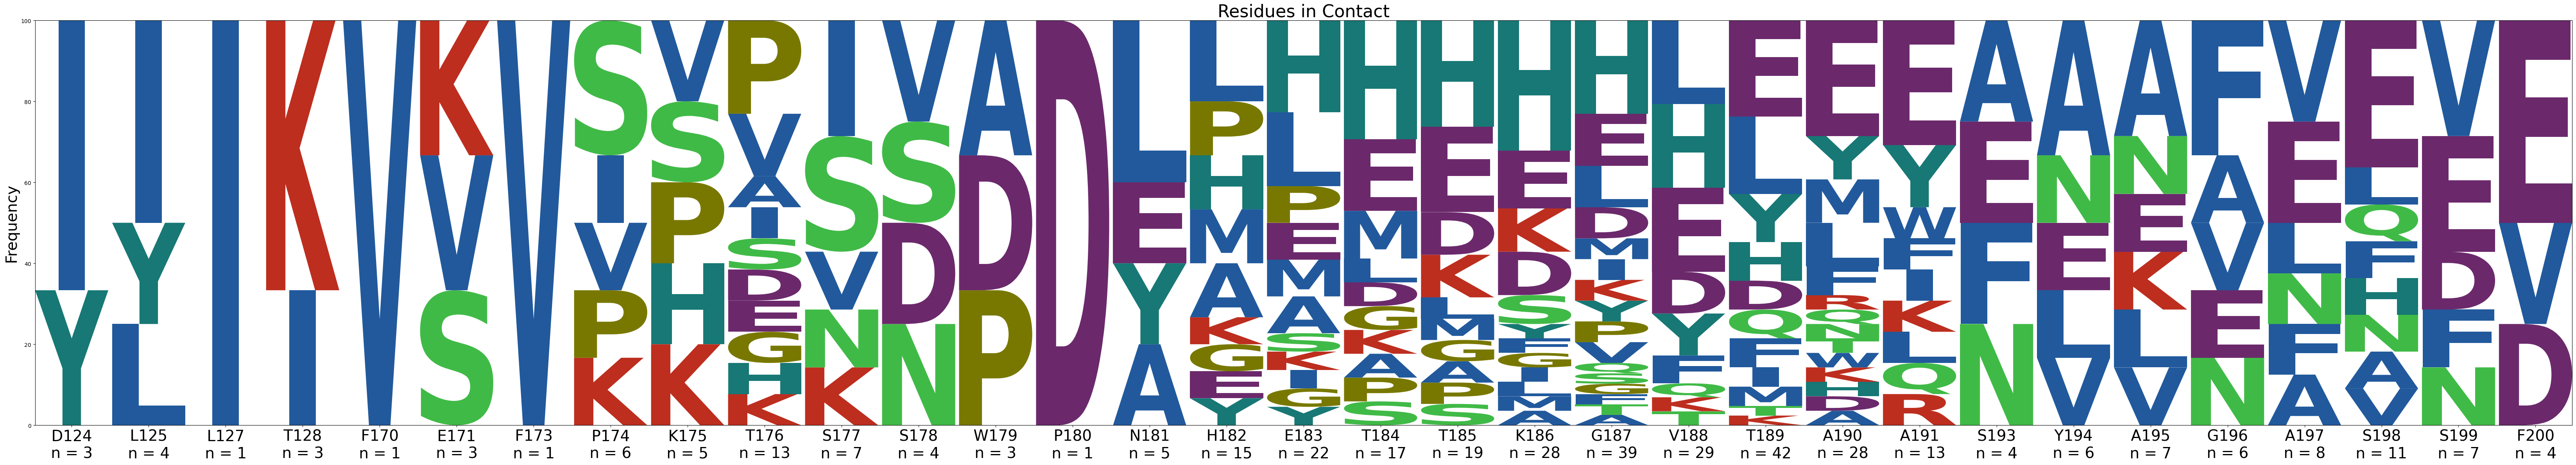

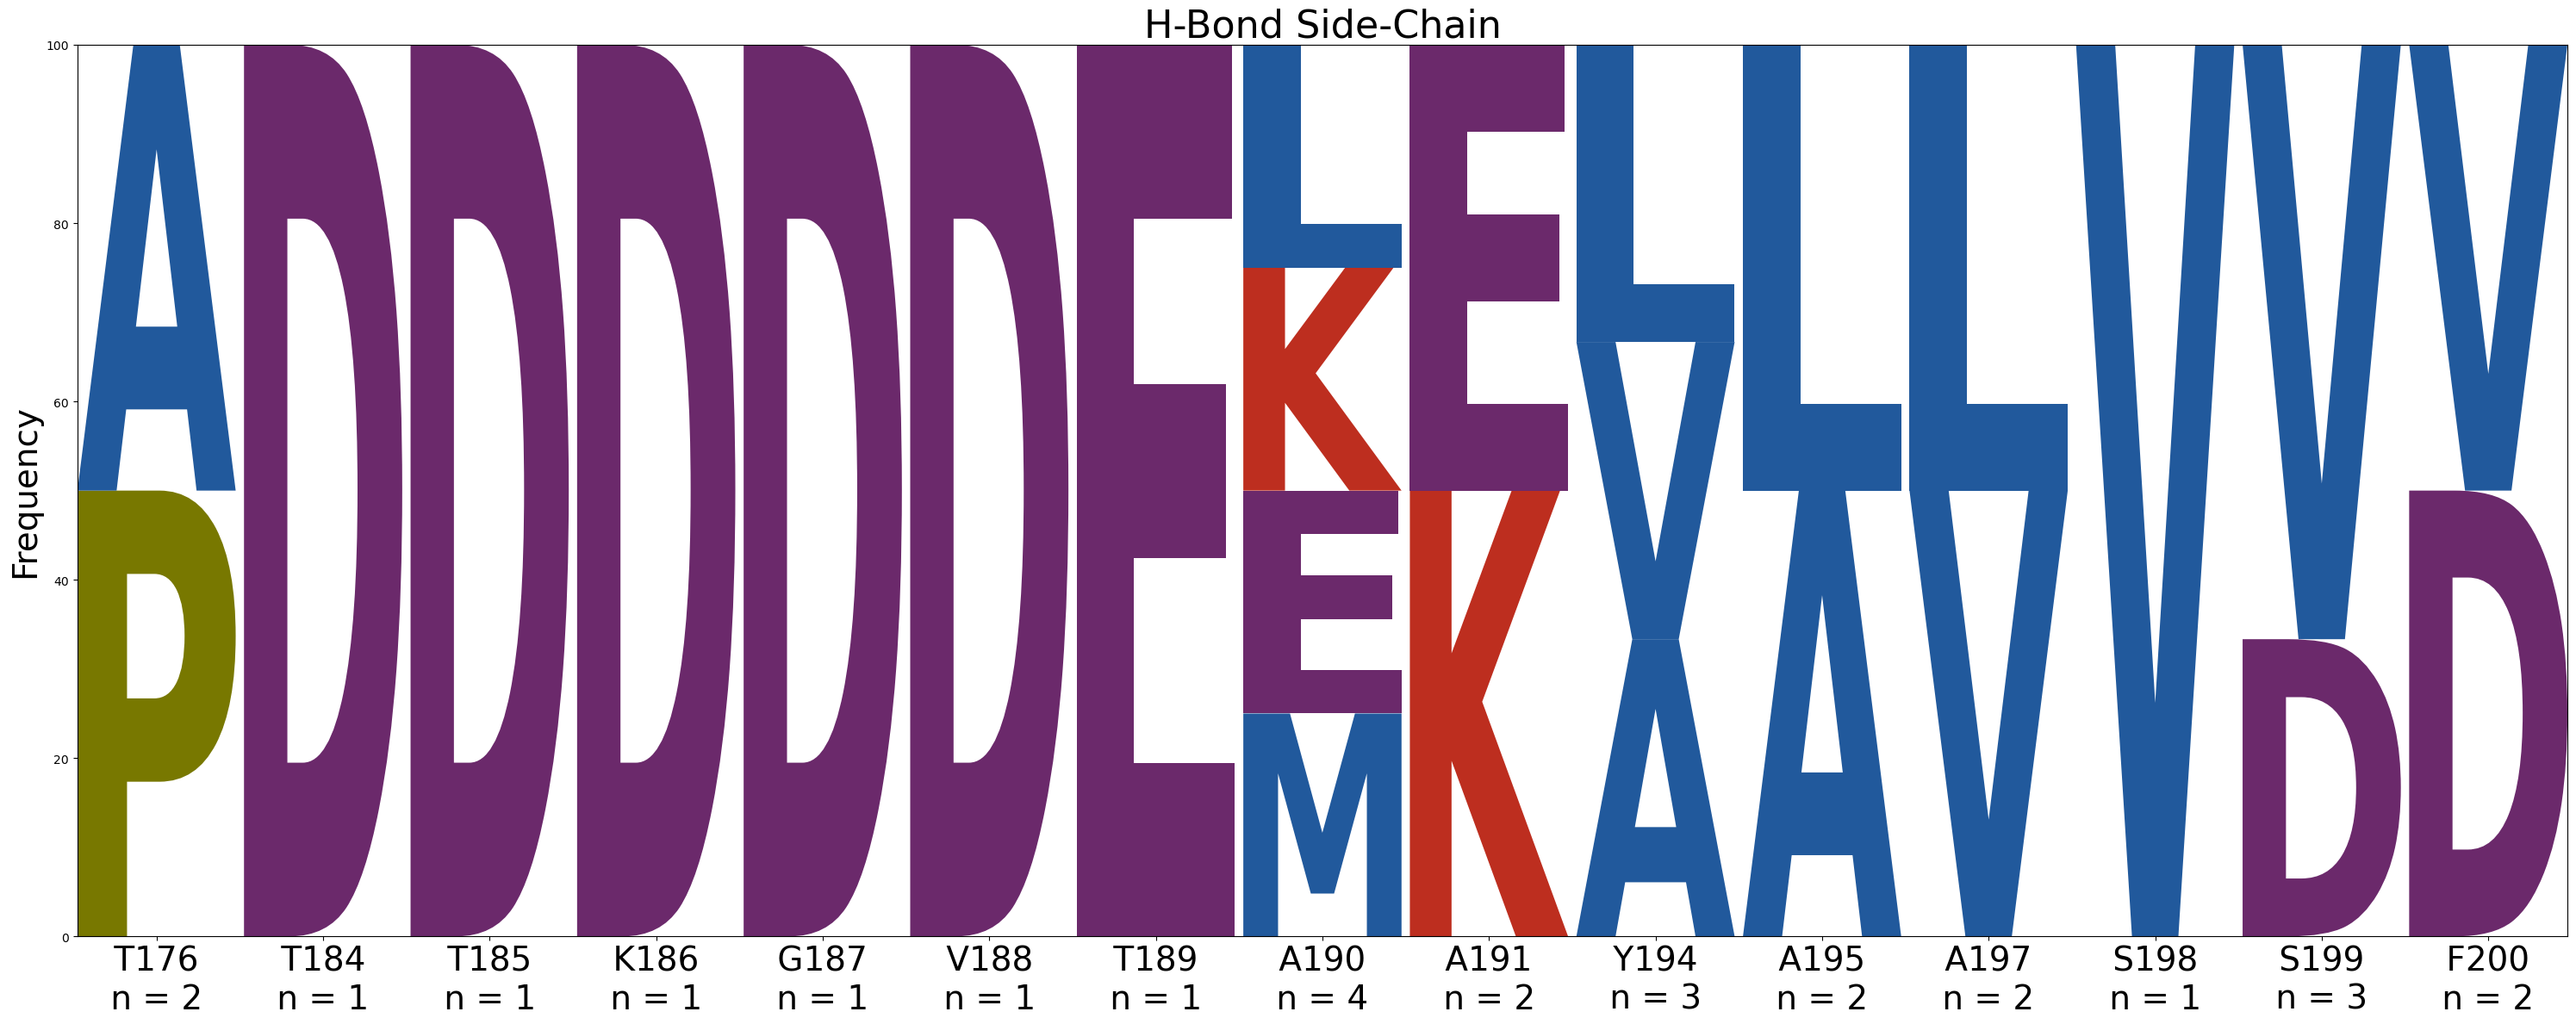

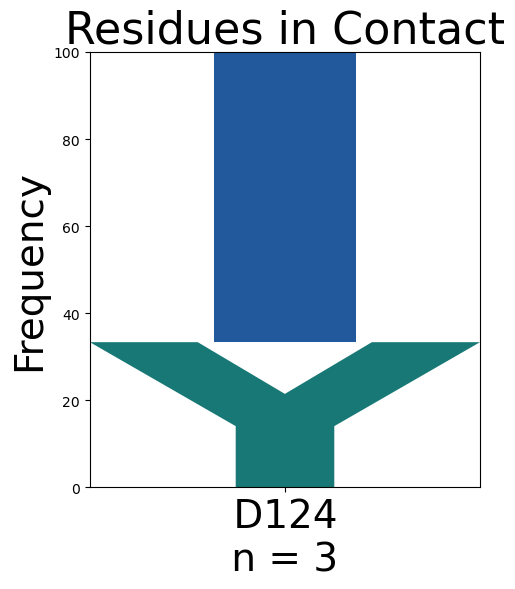

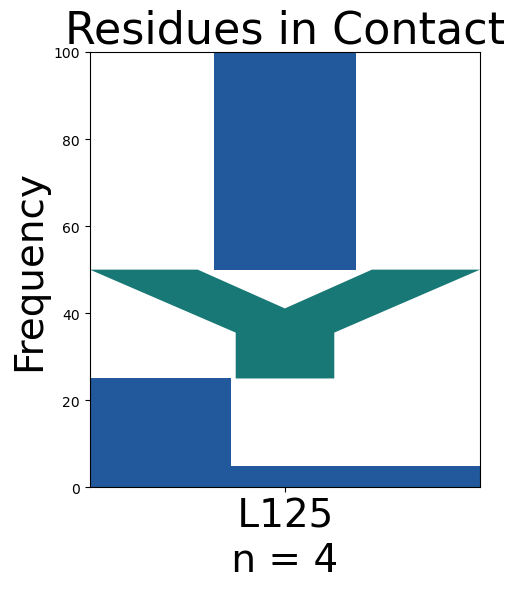

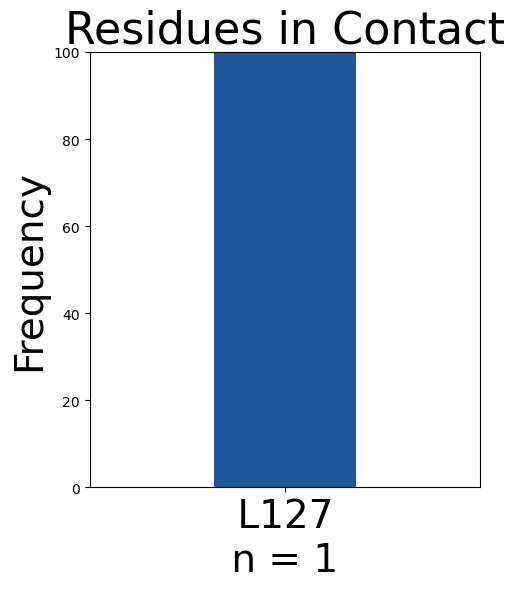

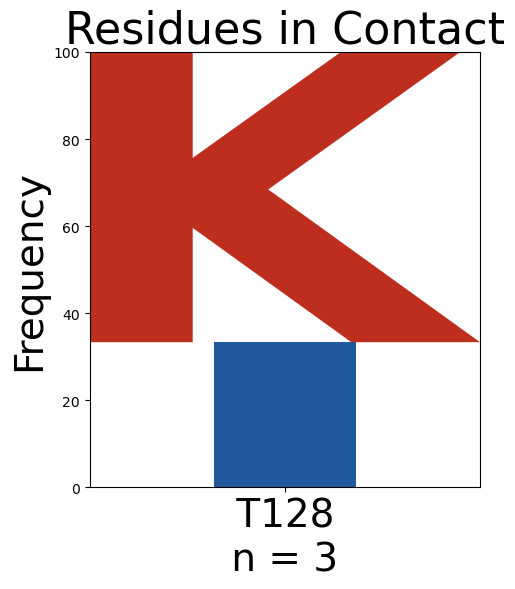

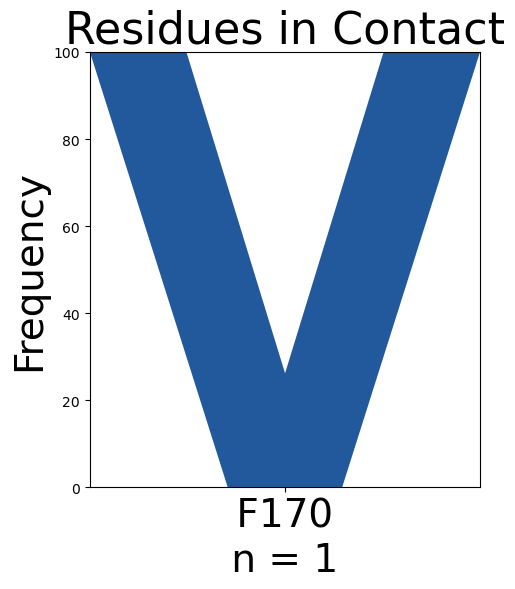

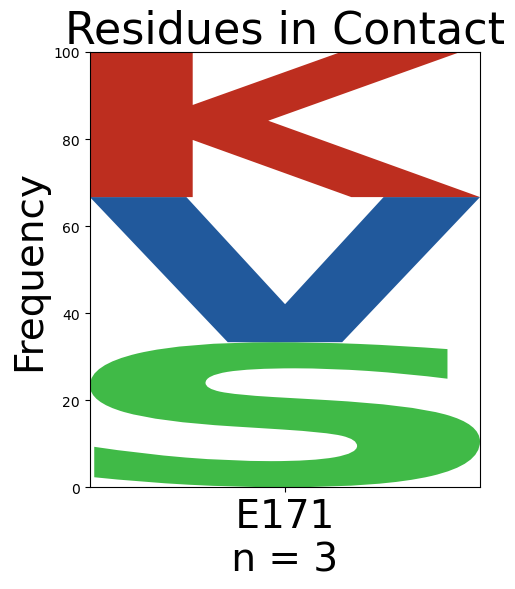

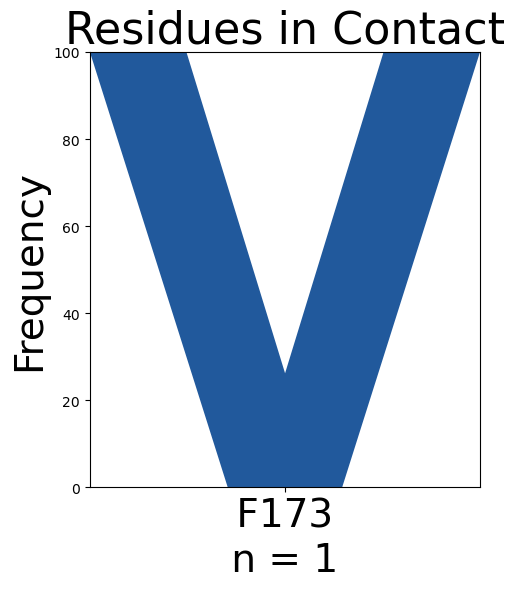

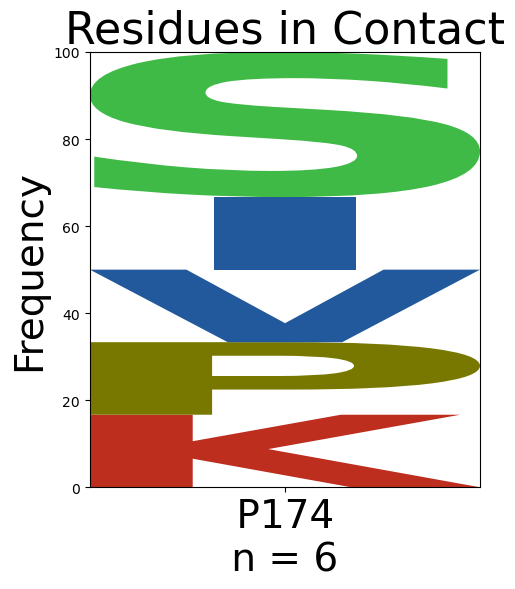

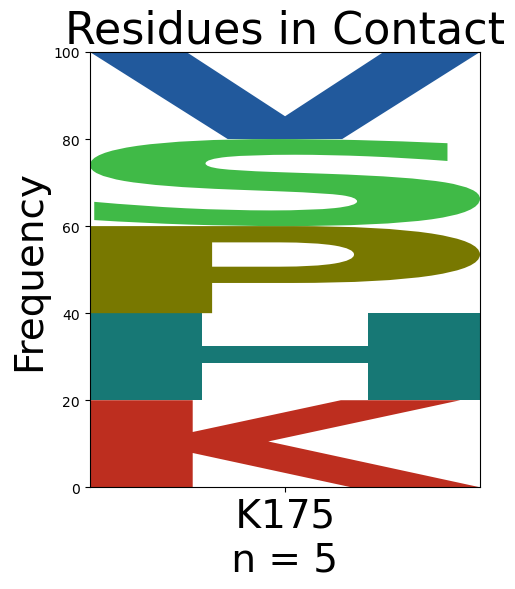

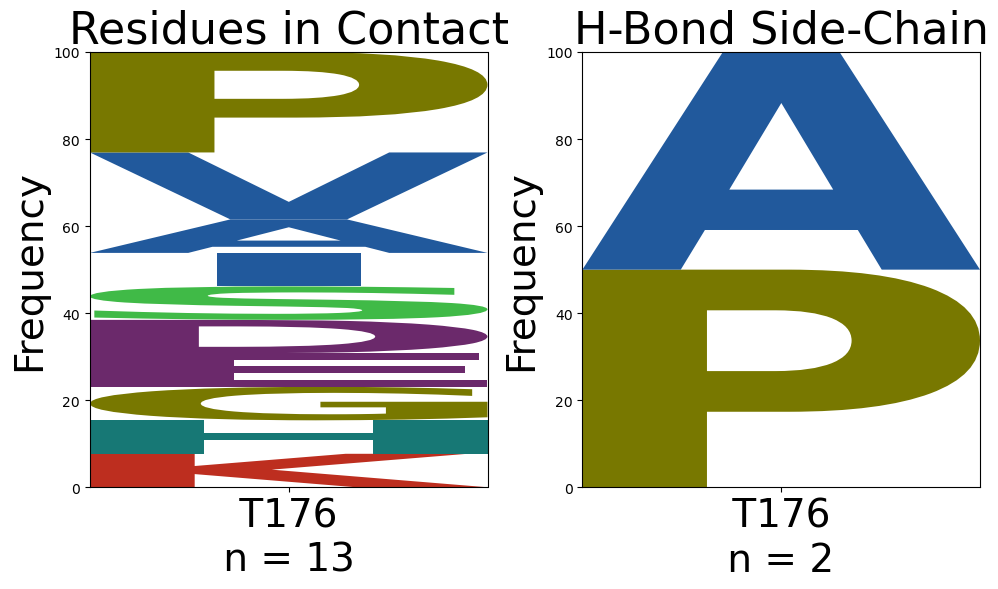

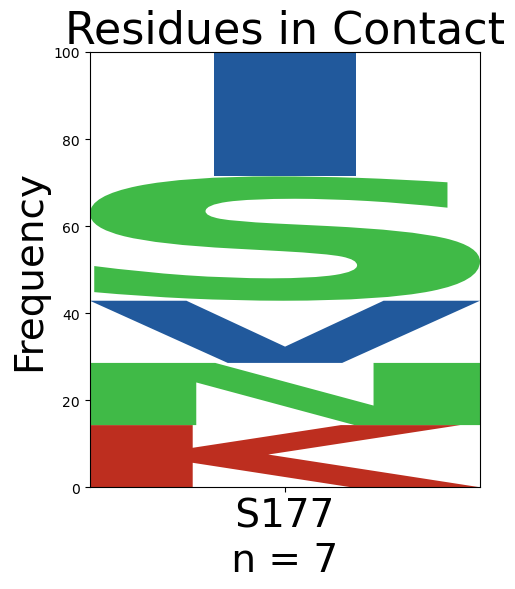

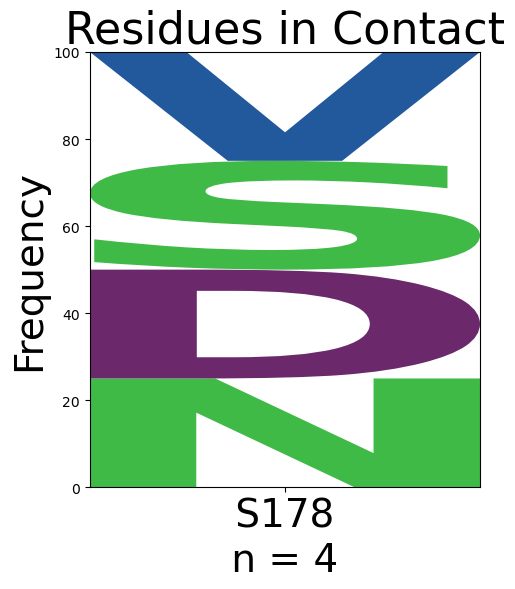

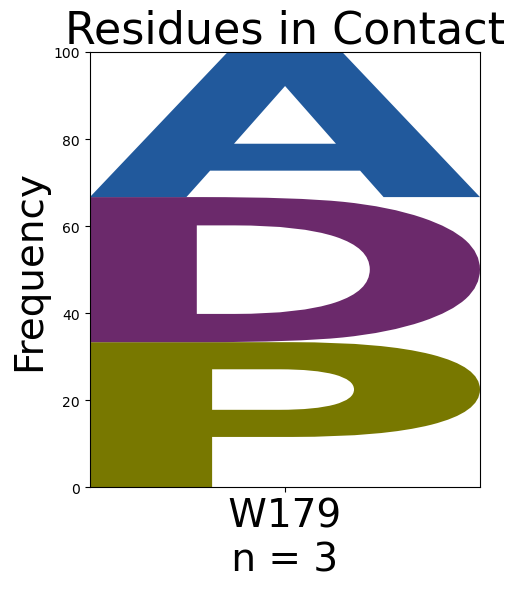

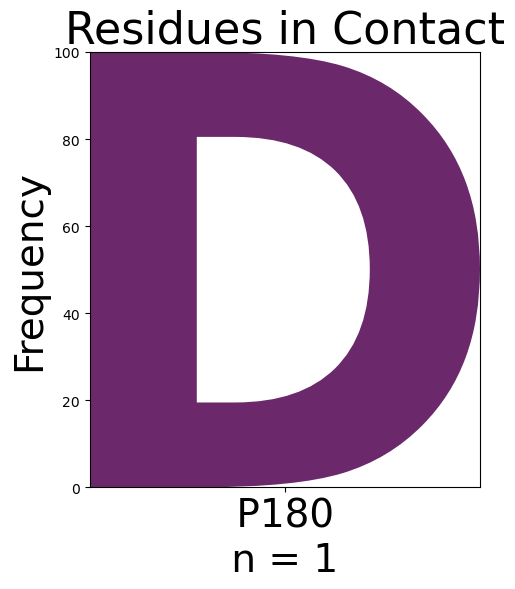

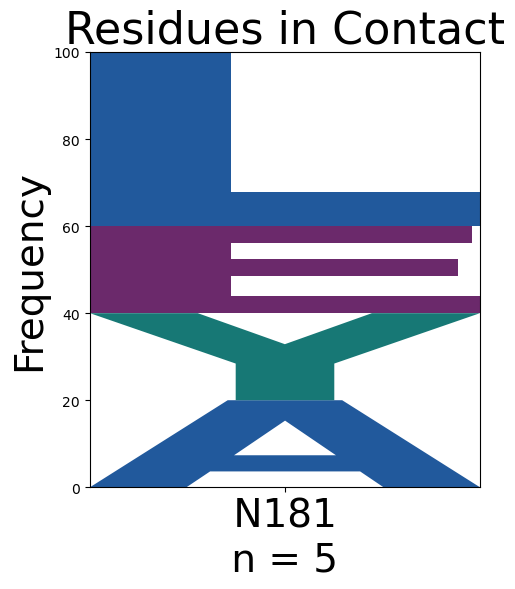

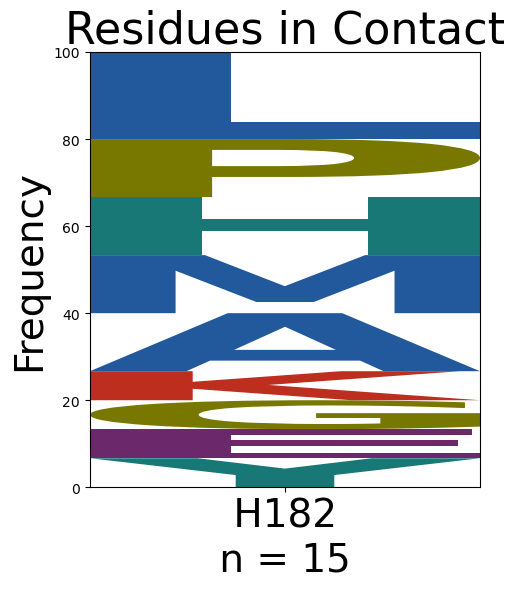

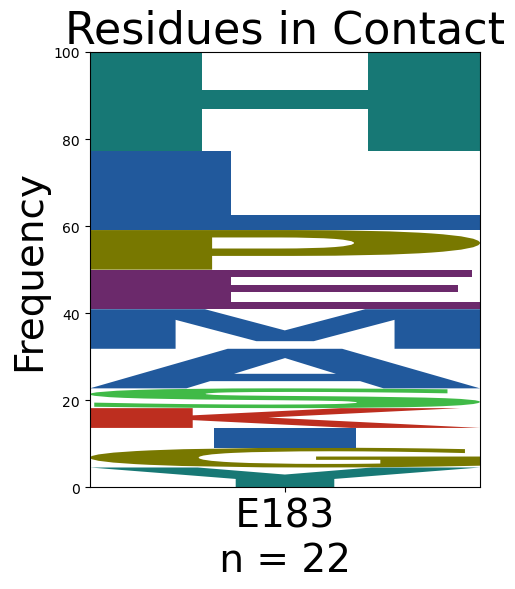

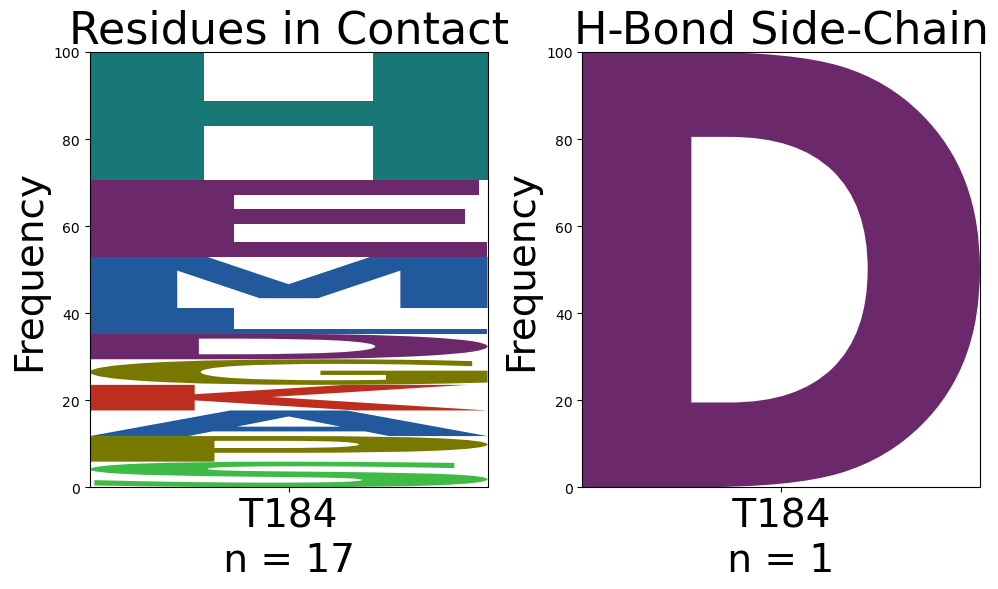

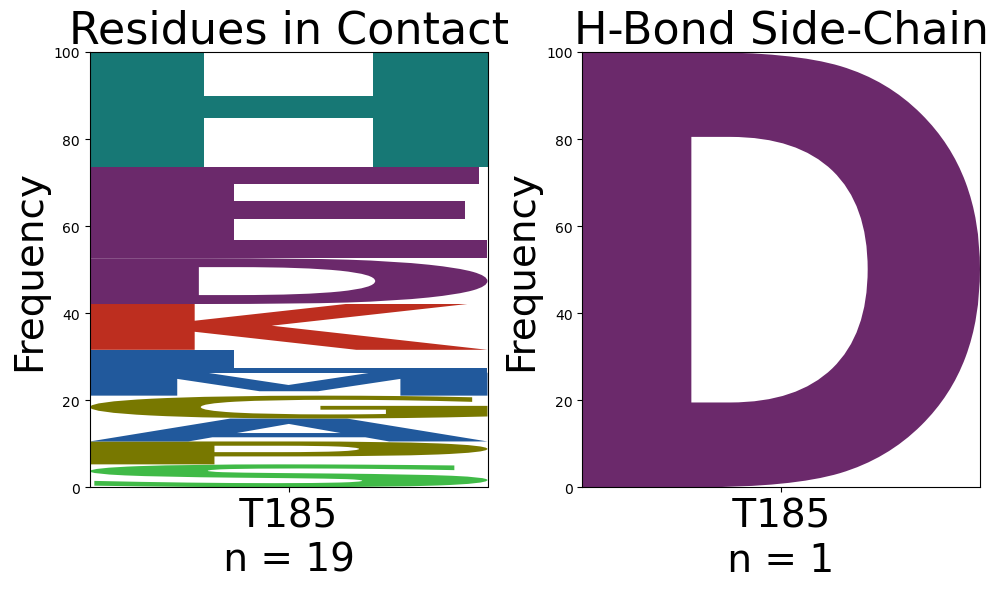

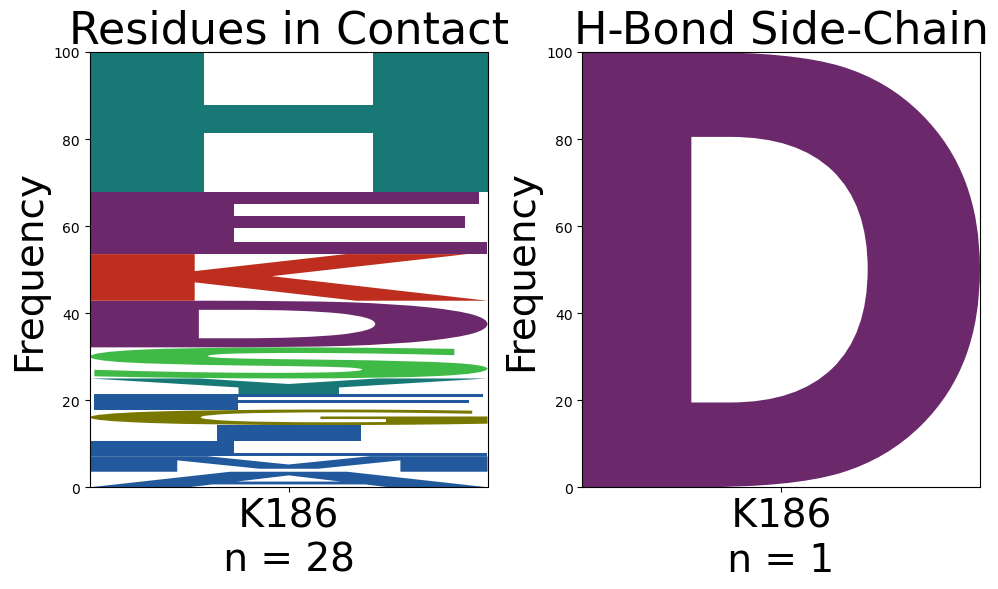

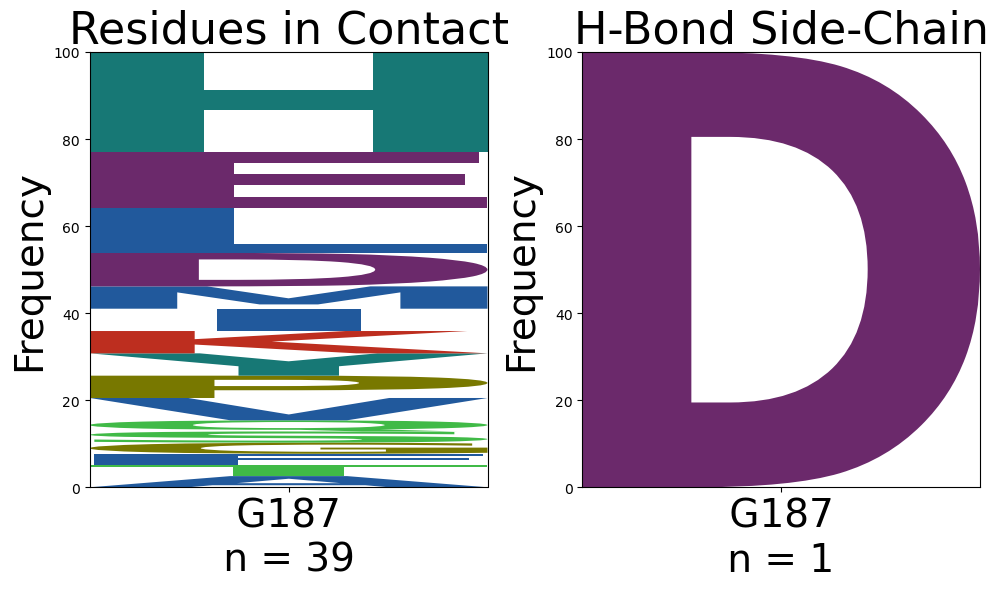

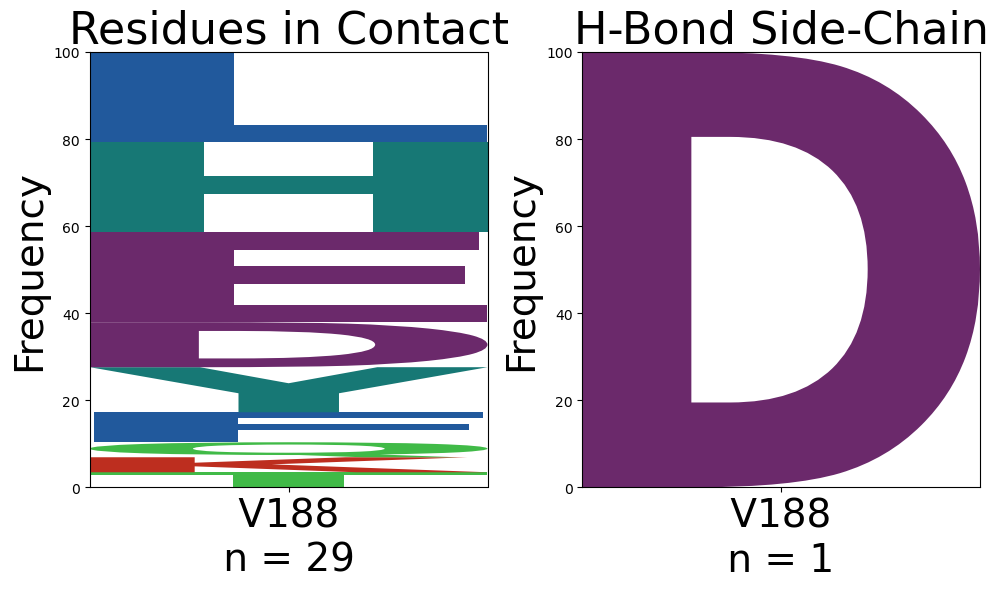

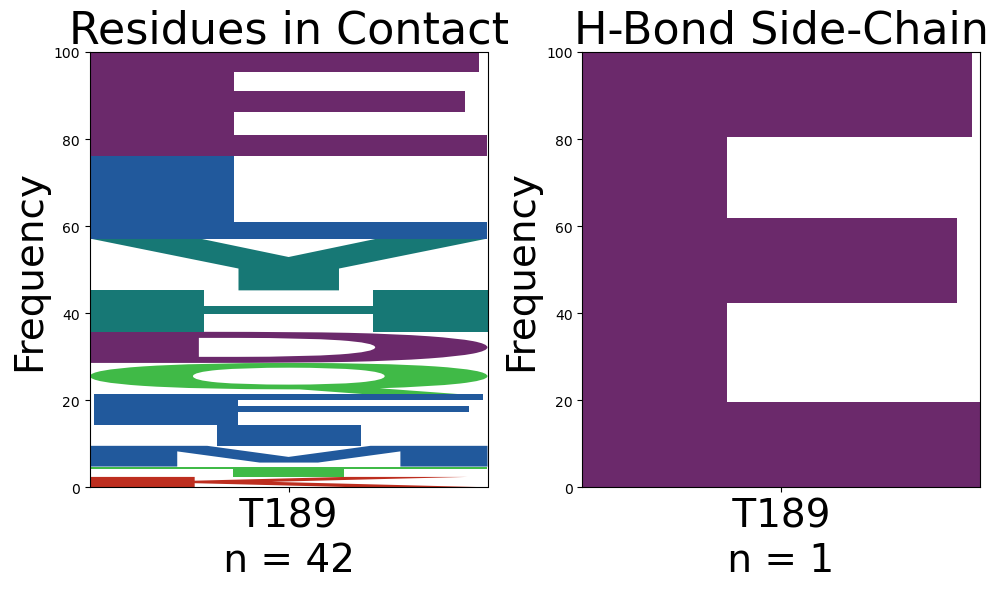

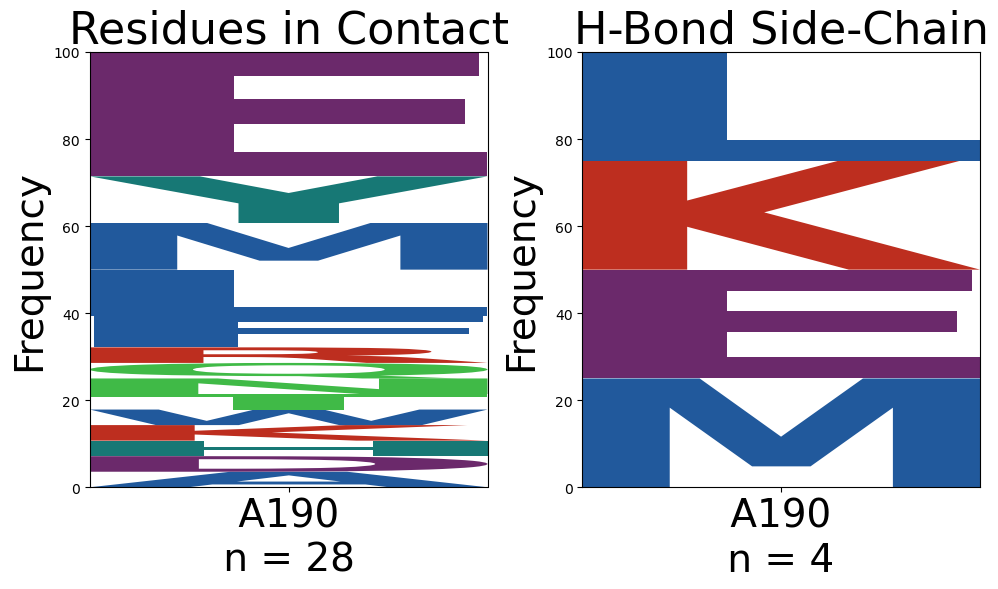

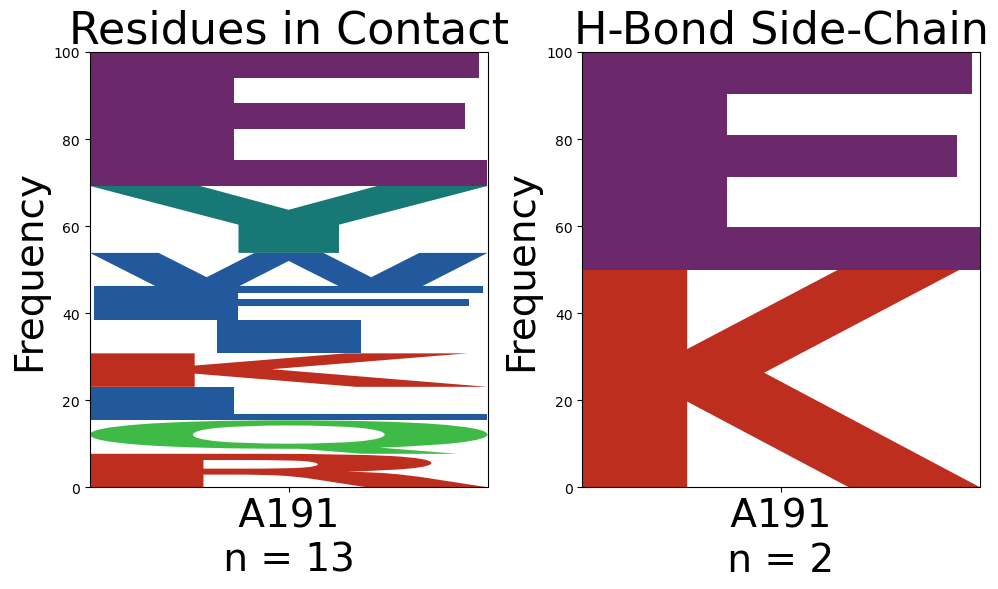

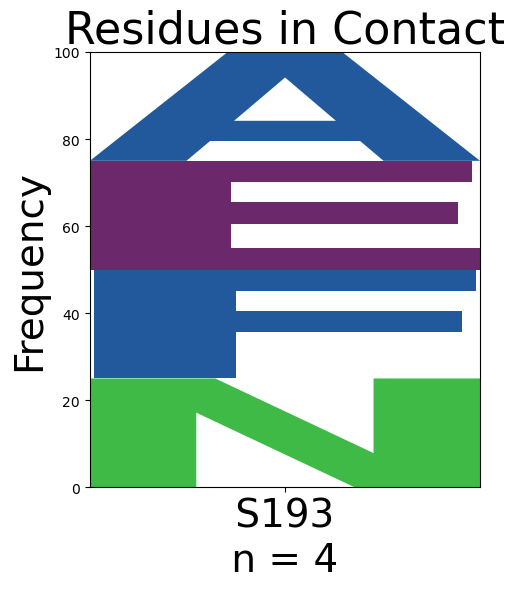

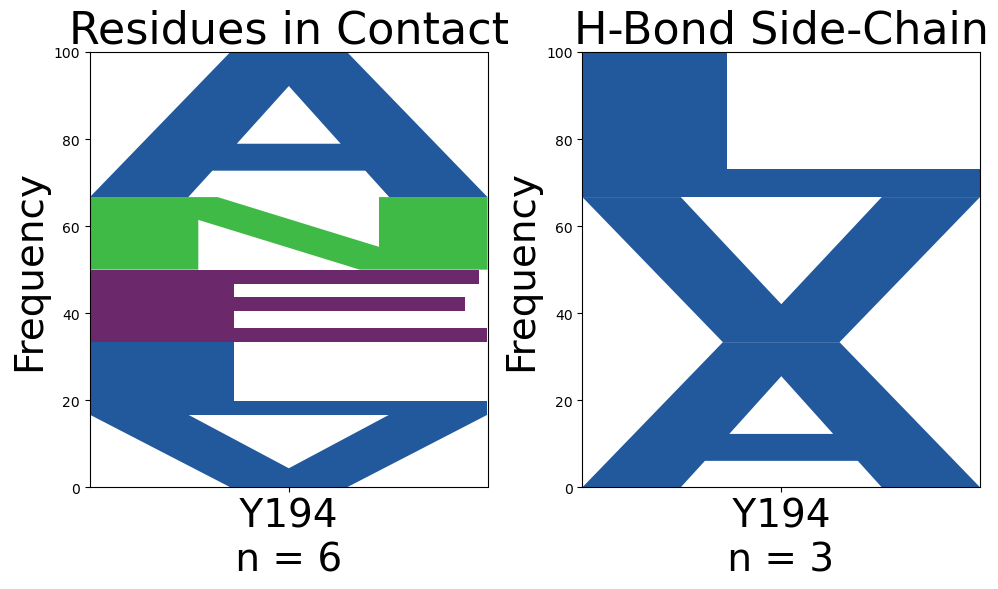

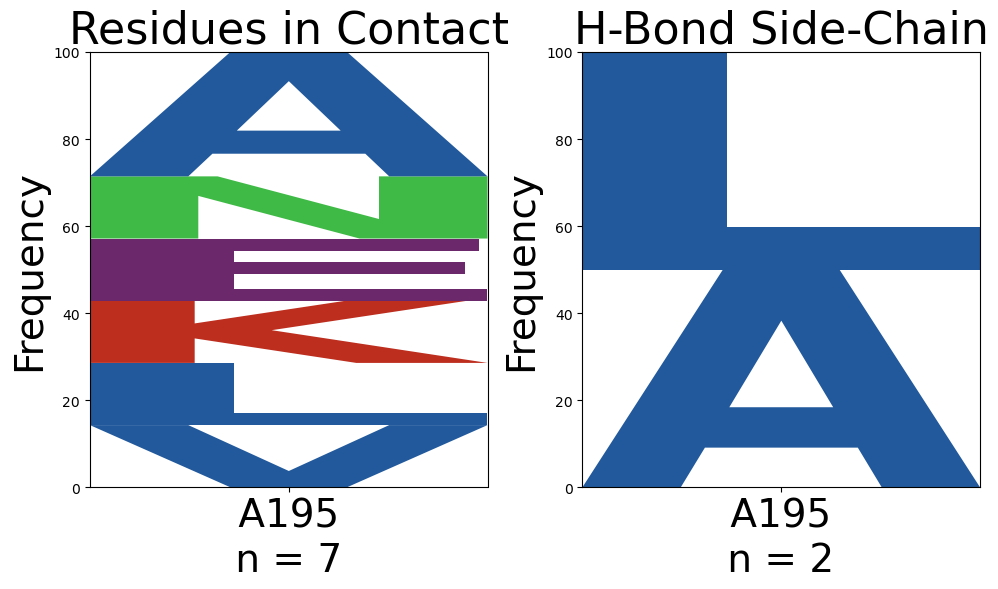

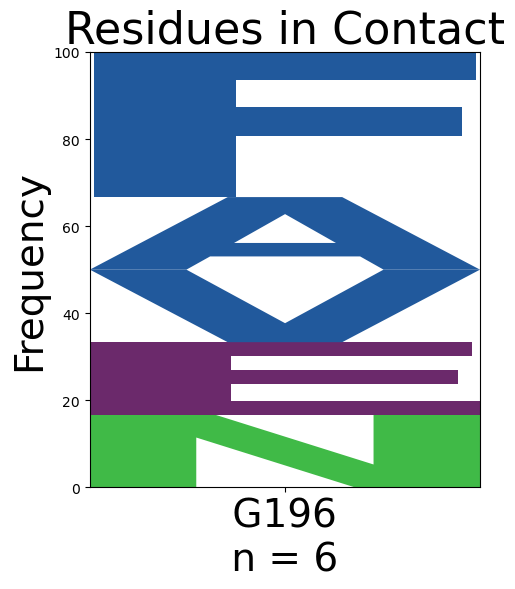

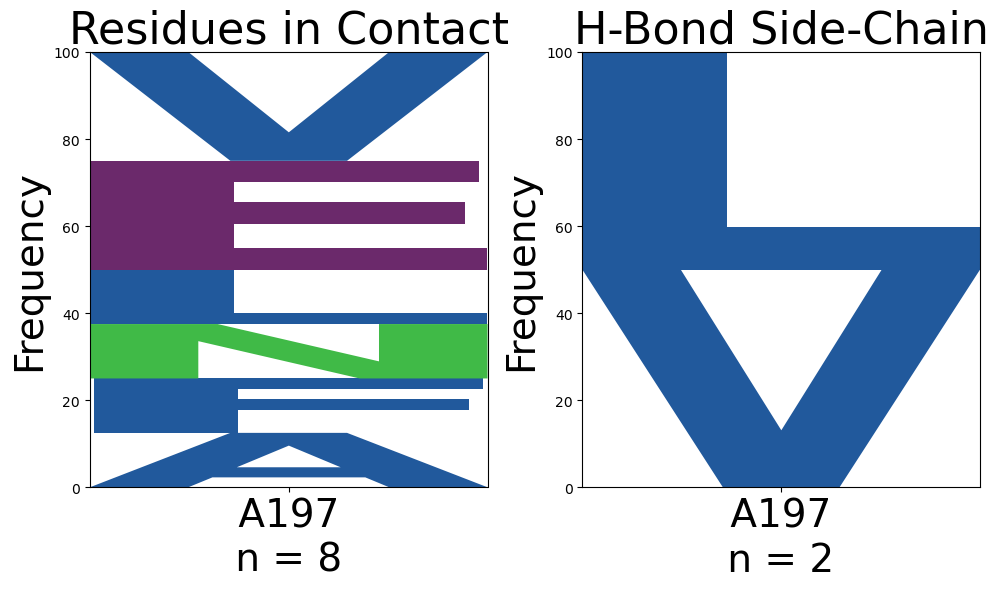

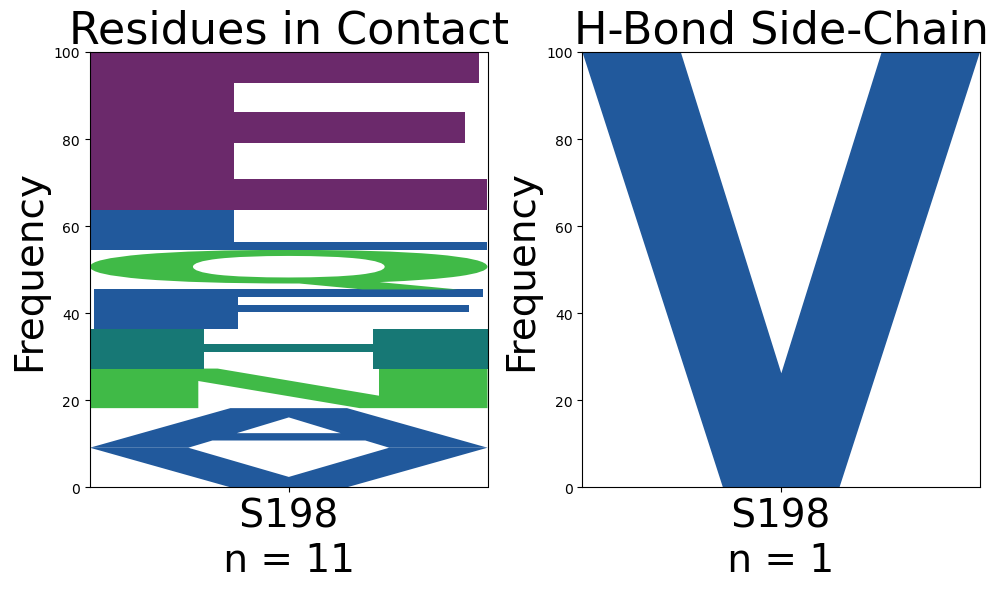

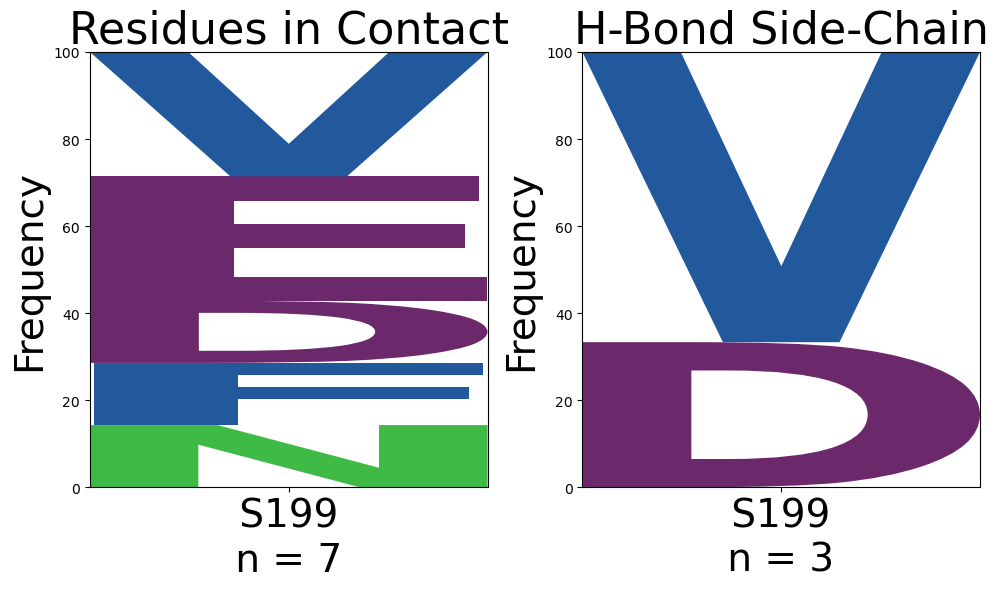

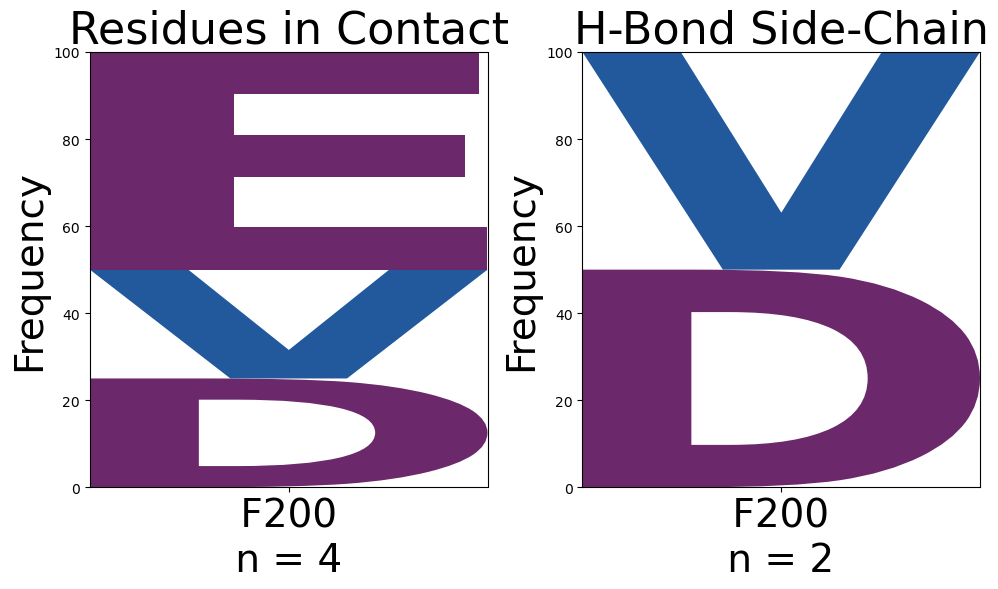

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline


combined = input("Only combined logo? (True or False): ")
if combined == 'True':
    combined = True
else: 
    combined = False
sequence_logo_main.sequence_logos(residues_found, target_chain, plot_list, is_ligand,combined, distance)
